# Web Scrapper

### PIP INSTALLING STUFF

In [58]:
%pip install beautifulsoup4
%pip install selenium
%pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## IMPORTING STUFF

In [59]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException

## FUNCTION FOR RENDERING PAGE

* Render the page in the background

In [60]:
def render_page(url):
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # Set up Chrome service
    service = Service(ChromeDriverManager().install())
    # Create new instance of Chrome in headless mode
    driver = webdriver.Chrome(service=service, options=chrome_options)
    # Set timeout to 10 seconds
    driver.set_page_load_timeout(360)
    # Navigate to the page
    driver.get(url)
    # Let the page load
    time.sleep(3)
    # Get page source
    r = driver.page_source
    # Close the browser
    driver.quit()

    return r

## FUNCTION FOR WEBSCRAPING WUNDERGROUND.COM

* Extract the historical data in wunderground.com
* handles error by storing the dates in error_dates
* continue to next date when encounter errors

In [61]:
error_dates = []  # Array to store dates that caused errors

def scraper(page, dates):
    output = pd.DataFrame()
    dfs = []
    

    for d in dates:
        
        try:

            url = str(str(page) + str(d))
            r = render_page(url)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            else:
                print('Data not in normal length')
        
        except Exception as e:
            print(f"An error occurred for date: {d}. Error: {str(e)}")
            error_dates.append(d) 
            continue 

        df_final = pd.concat([Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation], axis=1)
        df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

        dfs.append(df_final)

        output = pd.concat(dfs, ignore_index=True)
        

    print('Scraper done!')
    print(f"Errors occurred on the following dates: {error_dates}")

    output = output[['Date','Temp_max','Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                        'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                        'Pres_avg', 'Pres_min', 'Precipitation']]

    return output

## FINISHING AND ORGANISE THE DATA

* Clean the data and organise it into a usable format
* display the data

In [62]:
def finish_and_organise(df_output):

    df_output_1 = df_output.copy()

    # Set the maximum number of rows displayed to None, which means all rows will be displayed
    pd.set_option('display.max_rows', None)
    # Remove duplicate rows
    df_output_1 = df_output_1.drop_duplicates()
    # Remove rows where date is NaN
    df_output_1 = df_output_1.dropna(subset=['Date'])
    # Convert 'Date' to datetime
    df_output_1['Date'] = pd.to_datetime(df_output_1['Date']).dt.date
    # Extract year and month to a new column 'YearMonth'
    df_output_1['YearMonth'] = df_output_1['Date'].apply(lambda x: x.strftime('%Y-%m'))

    # Convert all columns except 'Date' into numeric
    for col in df_output_1.columns:
        if col != 'Date':
            df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')

    # Convert Temp and Dew data from Fahrenheit to Celsius
    for col in ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']:
        # Convert the column to numeric type, coercing non-numeric values to NaN
        df_output_1[col] = pd.to_numeric(df_output_1[col], errors='coerce')
        # Perform the conversion
        df_output_1[col] = ((df_output_1[col] - 32) * 5/9).round(1) 

    print("Final data length: ", len(df_output_1))
    # Create a list to hold the DataFrames
    dfs = []

    # For each unique 'YearMonth'
    for year_month in df_output_1['YearMonth'].unique():
        # Get the rows of the current 'YearMonth'
        rows = df_output_1[df_output_1['YearMonth'] == year_month]
        # Append the rows to the list
        dfs.append(rows)


    # Concatenate all DataFrames in the list
    weather_data = pd.concat(dfs).reset_index(drop=True)
    # Remove the 'YearMonth' column
    weather_data = weather_data.drop(columns=['YearMonth'])
    # Display the data
    print(weather_data)
    # Print the data type of each column
    print(weather_data.dtypes)

    return weather_data

## Convert to CSV file

* Convert 'Date' to datetime if it's not already
* Convert 'Date' to string in the format 'DD/MM/YYYY'
* Export the DataFrame to a CSV file

In [63]:
def csv_conv(weather_data):
    # Convert 'Date' to datetime if it's not already
    if weather_data['Date'].dtype != 'datetime64[ns]':
        weather_data['Date'] = pd.to_datetime(weather_data['Date'])

    # Convert 'Date' to string in the format 'DD/MM/YYYY'
    weather_data['Date'] = weather_data['Date'].dt.strftime('%d/%m/%Y')
    # Export the DataFrame to a CSV file
    weather_data.to_csv('weather_datatest.csv', index=False)

## Display The Datasets

* Show the first and last row of each months in a readable format

In [64]:
def show_datasets(df_output):
    # Create a list to hold the DataFrames
    dfs = []
    # Create a 'YearMonth' column from 'Date'
    df_output['YearMonth'] = pd.to_datetime(df_output['Date']).dt.to_period('M')

    # For each unique 'YearMonth'
    for year_month in df_output['YearMonth'].unique():
        # Get the first and last 3 rows of the current 'YearMonth'
        first_rows = df_output[df_output['YearMonth'] == year_month].head(1)
        last_rows = df_output[df_output['YearMonth'] == year_month].tail(1)
        # Concatenate the first and last rows
        result = pd.concat([first_rows, last_rows])
        # Append the result to the list
        dfs.append(result)
        # Create a separator DataFrame and append it to the list
        separator = pd.DataFrame({col: '-----' for col in df_output.columns}, index=[0])
        dfs.append(separator)

    # Concatenate all DataFrames in the list
    result = pd.concat(dfs).reset_index(drop=True)
    # Display the result
    display(result)

## RUN WEB SCRAPER

* Genrate dates from x year to y year

In [65]:
def generate_dates(start_year, end_year):
    dates = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            if year == 2024 and month > 5:
                break
            dates.append(f'{year}-{month}')
        if year == 2024 and month > 5:
            break
    return dates

* Run the Web Scrapper
* Please Input the range of the year 

In [66]:
# Enter the base page url to be scrape
# example:-
# page = 'https://www.wunderground.com/history/monthly/pt/lisbon/LPPT/date/'
page = 'https://www.wunderground.com/history/monthly/my/subang-jaya/WMSA/date/'

# Use the function to generate dates for a range of years
# dates = ['2024-3']
dates = generate_dates(2024, 2024)

# Run the scraper
df_output = scraper(page,dates)


In [ ]:
#2006-7
weather_data = finish_and_organise(df_output)
csv_conv(weather_data)

# Run the scraper again with only the error dates
df_error_output = scraper(page, error_dates)
error_dates = []

# Concatenate the completed dataset and the error dataset
df_combined = pd.concat([df_output, df_error_output])

# Convert the 'Date' column to datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Sort the combined dataset by date
df_combined = df_combined.sort_values(by='Date')

# Reset the index of the combined dataset
df_combined.reset_index(drop=True, inplace=True)

show_datasets(df_combined)

C:\Users\Ahmad Taufiq\AppData\Local\Temp\ipykernel_12904\393973316.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')


Final data length:  151
           Date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0    2024-01-01      32.8      28.4      25.0     26.1     25.1     22.8   
1    2024-01-02      32.2      27.8      25.0     26.1     25.1     23.9   
2    2024-01-03      32.2      27.6      26.1     26.1     24.9     23.9   
3    2024-01-04      32.8      27.7      26.1     25.0     24.9     23.9   
4    2024-01-05      32.8      28.4      25.0     25.0     23.8     22.2   
5    2024-01-06      31.1      27.5      25.0     25.0     24.4     22.8   
6    2024-01-07      27.2      26.2      25.0     25.0     24.4     23.9   
7    2024-01-08      31.1      27.3      25.0     25.0     24.2     23.9   
8    2024-01-09      31.1      26.8      25.0     26.1     24.7     23.9   
9    2024-01-10      32.8      27.8      23.9     26.1     24.2     22.8   
10   2024-01-11      32.8      28.3      26.1     26.1     24.9     23.9   
11   2024-01-12      32.8      28.3      25.0     25.0     23.8 

Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2024-3 finished!
31


Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2002-10 finished!
31
2003-5 finished!
31
2003-10 finished!
31


KeyboardInterrupt: 

# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn

In [ ]:
data_dir_1 = "2001-2024.csv"
weather = pd.read_csv(data_dir_1)

In [ ]:
print(weather)

            Date  Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  \
0      1/01/2001         32.8         28.7         25.0        23.9   
1      2/01/2001         31.1         24.8        -17.8        25.0   
2      3/01/2001         30.0         26.8         25.0        25.0   
3      4/01/2001         28.9         26.0         22.8        23.9   
4      5/01/2001         32.2         27.3         23.9        23.9   
...          ...          ...          ...          ...         ...   
8242  26/05/2024         35.0         28.7         26.1        26.1   
8243  27/05/2024         33.9         28.5         26.1        27.2   
8244  28/05/2024         33.9         29.7         26.1        27.2   
8245  29/05/2024         36.1         30.0         27.2        26.1   
8246  30/05/2024         33.9         28.5         26.1        27.2   

      Dew_avg(c)  Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  \
0           23.4        22.8          94        74.5          55   
1          

In [ ]:
print(weather.isna().sum())

Date             0
Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


In [ ]:
weather.shape

(8247, 17)

In [ ]:
weather_df = weather.drop('Date', axis=1)

In [ ]:
print(weather_df.isna().sum())

Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


<Axes: ylabel='Temp_avg(c)'>

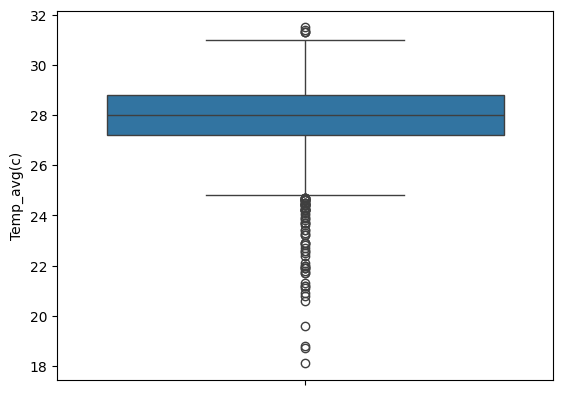

In [ ]:
sbn.boxplot(weather_df['Temp_avg(c)'])

IQR: 1.60
Lower_Fence: 24.80
Upper_Fence: 31.20

Display Outliers
      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
10           31.1         24.2        -17.8        22.8        20.5   
13           32.2         21.2        -17.8        23.9        17.4   
36           32.2         22.6        -17.8        23.9        19.4   
62           35.0         23.3        -17.8        25.0        18.9   
600          32.8         23.9        -17.8        25.0        21.6   
...           ...          ...          ...         ...         ...   
7003         25.0         23.7         22.8        23.9        22.6   
7352         25.0         24.4         23.9        23.9        23.6   
7495         36.1         31.3         27.2        26.1        24.2   
7754         26.1         24.3         22.2        23.9        22.9   
7790         26.1         24.6         23.9        23.9        23.4   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
10        

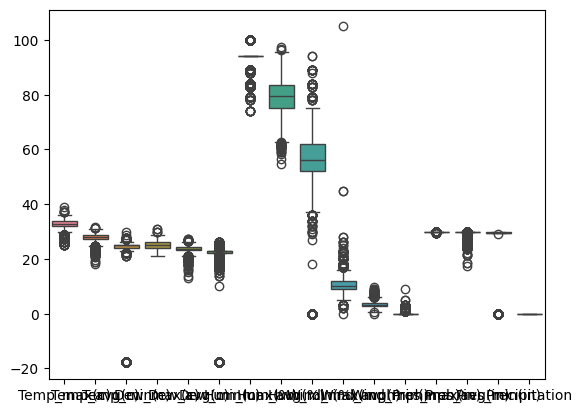

In [ ]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn 
sbn.boxplot(weather_df)

# Compute the Interquartile Range (IQR)
Q1 = weather_df['Temp_avg(c)'].quantile(0.25)
Q3 = weather_df['Temp_avg(c)'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (weather_df[((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

In [ ]:
weatherRemOut_df = weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))]
print(weatherRemOut_df)

      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0            32.8         28.7         25.0        23.9        23.4   
1            31.1         24.8        -17.8        25.0        21.4   
2            30.0         26.8         25.0        25.0        23.9   
3            28.9         26.0         22.8        23.9        23.2   
4            32.2         27.3         23.9        23.9        21.8   
...           ...          ...          ...         ...         ...   
8242         35.0         28.7         26.1        26.1        25.3   
8243         33.9         28.5         26.1        27.2        25.7   
8244         33.9         29.7         26.1        27.2        26.0   
8245         36.1         30.0         27.2        26.1        25.5   
8246         33.9         28.5         26.1        27.2        25.9   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0           22.8          94        74.5          55              8   
1    

In [ ]:
from sklearn.utils import shuffle

# Shuffle the data to avoid biasness

df_shuffled = shuffle(weatherRemOut_df, random_state=42)

df_shuffled.to_csv('no_feature_scaling.csv',index= False)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize StandardScaler
scaler = RobustScaler()

# Fit the scaler to data and transform
scaled_data = scaler.fit_transform(df_shuffled)

# Covert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = df_shuffled.columns)
print("\nScaled Data: \n", scaled_df)


Scaled Data: 
       Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0        0.000000      -0.3125          0.0         0.0    0.307692   
1       -0.352941      -0.7500         -1.0         0.0   -0.230769   
2        0.647059       0.3125          0.0         0.5    0.769231   
3       -0.352941      -0.4375          0.0        -0.5   -0.538462   
4       -1.000000      -0.3750          0.0         0.5    0.461538   
...           ...          ...          ...         ...         ...   
8164     0.647059       0.3125          1.0         0.5    0.153846   
8165     0.647059       0.6250          0.0        -0.5   -0.538462   
8166     1.294118       0.4375          0.0         0.0    0.000000   
8167    -1.000000      -1.3750         -1.0         0.5    0.230769   
8168    -1.000000      -0.8750         -1.0         0.0   -0.461538   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0      -1.000000         0.0    0.402439         0.7       2

In [ ]:
scaled_df.to_csv('scaled_data.csv', index=False)

### PIP INSTALLING STUFF

In [ ]:
%pip install beautifulsoup4
%pip install selenium
%pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## IMPORTING STUFF

In [ ]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException

## FUNCTION FOR RENDERING PAGE

* Render the page in the background

In [ ]:
def render_page(url):
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # Set up Chrome service
    service = Service(ChromeDriverManager().install())
    # Create new instance of Chrome in headless mode
    driver = webdriver.Chrome(service=service, options=chrome_options)
    # Set timeout to 10 seconds
    driver.set_page_load_timeout(360)
    # Navigate to the page
    driver.get(url)
    # Let the page load
    time.sleep(3)
    # Get page source
    r = driver.page_source
    # Close the browser
    driver.quit()

    return r

## FUNCTION FOR WEBSCRAPING WUNDERGROUND.COM

* Extract the historical data in wunderground.com
* handles error by storing the dates in error_dates
* continue to next date when encounter errors

In [ ]:
error_dates = []  # Array to store dates that caused errors

def scraper(page, dates):
    output = pd.DataFrame()
    dfs = []
    

    for d in dates:
        
        try:

            url = str(str(page) + str(d))
            r = render_page(url)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            else:
                print('Data not in normal length')
        
        except Exception as e:
            print(f"An error occurred for date: {d}. Error: {str(e)}")
            error_dates.append(d) 
            continue 

        df_final = pd.concat([Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation], axis=1)
        df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

        dfs.append(df_final)

        output = pd.concat(dfs, ignore_index=True)
        

    print('Scraper done!')
    print(f"Errors occurred on the following dates: {error_dates}")

    output = output[['Date','Temp_max','Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                        'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                        'Pres_avg', 'Pres_min', 'Precipitation']]

    return output

## FINISHING AND ORGANISE THE DATA

* Clean the data and organise it into a usable format
* display the data

In [ ]:
def finish_and_organise(df_output):

    df_output_1 = df_output.copy()

    # Set the maximum number of rows displayed to None, which means all rows will be displayed
    pd.set_option('display.max_rows', None)
    # Remove duplicate rows
    df_output_1 = df_output_1.drop_duplicates()
    # Remove rows where date is NaN
    df_output_1 = df_output_1.dropna(subset=['Date'])
    # Convert 'Date' to datetime
    df_output_1['Date'] = pd.to_datetime(df_output_1['Date']).dt.date
    # Extract year and month to a new column 'YearMonth'
    df_output_1['YearMonth'] = df_output_1['Date'].apply(lambda x: x.strftime('%Y-%m'))

    # Convert all columns except 'Date' into numeric
    for col in df_output_1.columns:
        if col != 'Date':
            df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')

    # Convert Temp and Dew data from Fahrenheit to Celsius
    for col in ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']:
        # Convert the column to numeric type, coercing non-numeric values to NaN
        df_output_1[col] = pd.to_numeric(df_output_1[col], errors='coerce')
        # Perform the conversion
        df_output_1[col] = ((df_output_1[col] - 32) * 5/9).round(1) 

    print("Final data length: ", len(df_output_1))
    # Create a list to hold the DataFrames
    dfs = []

    # For each unique 'YearMonth'
    for year_month in df_output_1['YearMonth'].unique():
        # Get the rows of the current 'YearMonth'
        rows = df_output_1[df_output_1['YearMonth'] == year_month]
        # Append the rows to the list
        dfs.append(rows)


    # Concatenate all DataFrames in the list
    weather_data = pd.concat(dfs).reset_index(drop=True)
    # Remove the 'YearMonth' column
    weather_data = weather_data.drop(columns=['YearMonth'])
    # Display the data
    print(weather_data)
    # Print the data type of each column
    print(weather_data.dtypes)

    return weather_data

## Convert to CSV file

* Convert 'Date' to datetime if it's not already
* Convert 'Date' to string in the format 'DD/MM/YYYY'
* Export the DataFrame to a CSV file

In [ ]:
def csv_conv(weather_data):
    # Convert 'Date' to datetime if it's not already
    if weather_data['Date'].dtype != 'datetime64[ns]':
        weather_data['Date'] = pd.to_datetime(weather_data['Date'])

    # Convert 'Date' to string in the format 'DD/MM/YYYY'
    weather_data['Date'] = weather_data['Date'].dt.strftime('%d/%m/%Y')
    # Export the DataFrame to a CSV file
    weather_data.to_csv('weather_datatest.csv', index=False)

## Display The Datasets

* Show the first and last row of each months in a readable format

In [ ]:
def show_datasets(df_output):
    # Create a list to hold the DataFrames
    dfs = []
    # Create a 'YearMonth' column from 'Date'
    df_output['YearMonth'] = pd.to_datetime(df_output['Date']).dt.to_period('M')

    # For each unique 'YearMonth'
    for year_month in df_output['YearMonth'].unique():
        # Get the first and last 3 rows of the current 'YearMonth'
        first_rows = df_output[df_output['YearMonth'] == year_month].head(1)
        last_rows = df_output[df_output['YearMonth'] == year_month].tail(1)
        # Concatenate the first and last rows
        result = pd.concat([first_rows, last_rows])
        # Append the result to the list
        dfs.append(result)
        # Create a separator DataFrame and append it to the list
        separator = pd.DataFrame({col: '-----' for col in df_output.columns}, index=[0])
        dfs.append(separator)

    # Concatenate all DataFrames in the list
    result = pd.concat(dfs).reset_index(drop=True)
    # Display the result
    display(result)

## RUN WEB SCRAPER

* Genrate dates from x year to y year

In [ ]:
def generate_dates(start_year, end_year):
    dates = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            if year == 2024 and month > 5:
                break
            dates.append(f'{year}-{month}')
        if year == 2024 and month > 5:
            break
    return dates

* Run the Web Scrapper
* Please Input the range of the year 

In [ ]:
# Enter the base page url to be scrape
# example:-
# page = 'https://www.wunderground.com/history/monthly/pt/lisbon/LPPT/date/'
page = 'https://www.wunderground.com/history/monthly/my/subang-jaya/WMSA/date/'

# Use the function to generate dates for a range of years
# dates = ['2024-3']
dates = generate_dates(2024, 2024)

# Run the scraper
df_output = scraper(page,dates)


2024-1 finished!
31
2024-2 finished!
29
2024-3 finished!
31
2024-4 finished!
30
Data not in normal length
Scraper done!
Errors occurred on the following dates: ['2012-7', '2016-6', '2024-3', '2002-10', '2003-5', '2003-10', '2004-4', '2004-12', '2010-9', '2011-5', '2013-6', '2017-2', '2019-11']


In [ ]:
#2006-7
weather_data = finish_and_organise(df_output)
csv_conv(weather_data)

# Run the scraper again with only the error dates
df_error_output = scraper(page, error_dates)
error_dates = []

# Concatenate the completed dataset and the error dataset
df_combined = pd.concat([df_output, df_error_output])

# Convert the 'Date' column to datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Sort the combined dataset by date
df_combined = df_combined.sort_values(by='Date')

# Reset the index of the combined dataset
df_combined.reset_index(drop=True, inplace=True)

show_datasets(df_combined)

C:\Users\Ahmad Taufiq\AppData\Local\Temp\ipykernel_12904\393973316.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')


Final data length:  151
           Date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0    2024-01-01      32.8      28.4      25.0     26.1     25.1     22.8   
1    2024-01-02      32.2      27.8      25.0     26.1     25.1     23.9   
2    2024-01-03      32.2      27.6      26.1     26.1     24.9     23.9   
3    2024-01-04      32.8      27.7      26.1     25.0     24.9     23.9   
4    2024-01-05      32.8      28.4      25.0     25.0     23.8     22.2   
5    2024-01-06      31.1      27.5      25.0     25.0     24.4     22.8   
6    2024-01-07      27.2      26.2      25.0     25.0     24.4     23.9   
7    2024-01-08      31.1      27.3      25.0     25.0     24.2     23.9   
8    2024-01-09      31.1      26.8      25.0     26.1     24.7     23.9   
9    2024-01-10      32.8      27.8      23.9     26.1     24.2     22.8   
10   2024-01-11      32.8      28.3      26.1     26.1     24.9     23.9   
11   2024-01-12      32.8      28.3      25.0     25.0     23.8 

Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2024-3 finished!
31


Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2002-10 finished!
31
2003-5 finished!
31
2003-10 finished!
31


KeyboardInterrupt: 

# Linear Regression & Multiple Linear Regression

In [ ]:
import pandas as pd

scaled_df = pd.read_csv("scaled_df")

# Set the target variable
DV = 'Temp_avg(c)'

# Drop DV so x only have independent variable
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(x_train)

      Temp_max(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  Dew_min(c)  \
4960     0.647059          0.0         0.0    0.230769    0.000000   
3443     0.647059          0.0         1.0    1.307692    1.833333   
7387     1.294118          1.0         0.5    0.384615    0.000000   
4898     0.647059          0.0         0.0   -0.153846   -1.000000   
5067     0.647059          0.0         0.0   -0.538462   -1.000000   
...           ...          ...         ...         ...         ...   
5226     0.647059          1.0         0.5    0.461538    0.000000   
5390    -0.352941          0.0         0.5    1.076923    3.666667   
860      0.000000          1.0         0.0    0.076923    0.000000   
7603    -0.352941         -2.0         0.0   -0.692308   -1.000000   
7270     0.647059          2.0         0.0   -0.076923   -2.833333   

      Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  Wind_avg(mph)  \
4960         0.0   -0.487805        -0.4      -0.666667      -0.461538   
3443       

## Simple Linear Regression
Using regression in one independent variable

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit model to data only using the humidity column
model.fit (x_train [['Hum_avg(%)']], y_train)

LinearRegression()

### Prediction

In [ ]:
# Generate Prediction on Test Data
predictions = model.predict(x_test[['Hum_avg(%)']])

### Plot

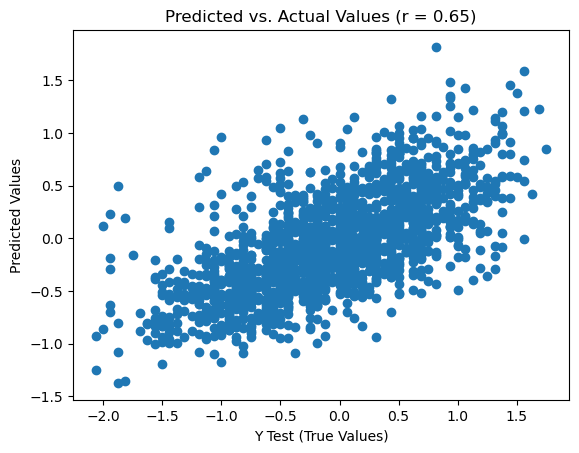

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


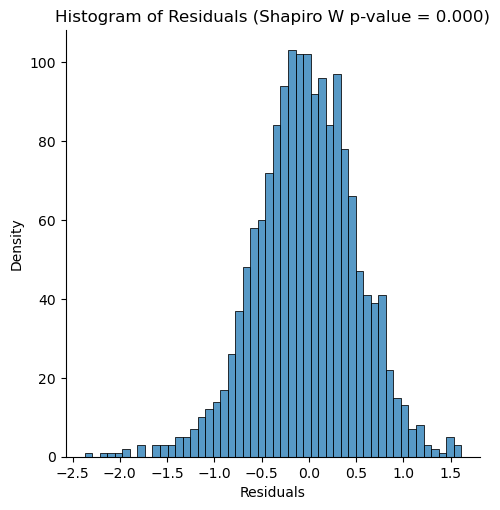

In [ ]:
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()

### Performance Metrics

In [ ]:
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.417
1        MSE  0.285
2       RMSE  0.534
3  R-Squared  0.428


## Multiple Linear Regression
Using multiple features as independant variable

In [ ]:
# Fit the model with all features of x
model.fit(x_train, y_train)

LinearRegression()

### Prediction

In [ ]:
# Generate a prediction based on the training data
predictions = model.predict(x_test) 

### Plot

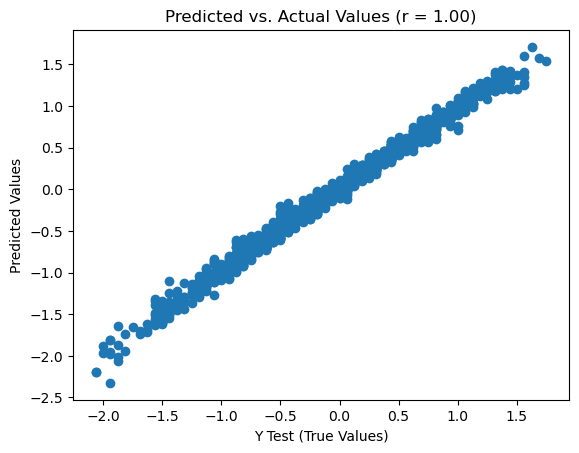

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


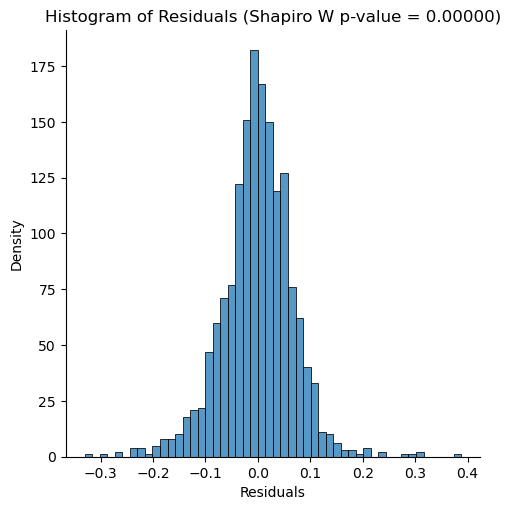

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.5f})'.format(shapiro(y_test -predictions)[1]))
plt.show()

### Performance Metrics

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.068
3  R-Squared  0.991


## Conclusion

Using simple linear regression, it produces a subpar results:

1. MSE = 0.285
2. RMSE = 0.534
3. R-Squared = 0.428

Decent MSE and RMSE is acquired but very low R-Squared of only 42.8% confidence of the outcome. Based on the scatterplot and histogram of residuals, a better result could be achieved if multiple features are used.

When applying multiple linear regression (using all features), the model produces a very good result:

1. MSE = 0.005
2. RMSE = 0.068
3. R-Squared = 0.991

However, this could be the consequence of overfitting or over-processed of the dataframe. Based on the graphs (scatterplot with r=1.00), it is highly likely the case of overfitting. Hence, further testing with other prediction models is required.

## **Split the Data**

Train : 70
Test  : 30

# Neural Network

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr, shapiro
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
data_dir_1 = "2001-2024.csv"
weather = pd.read_csv(data_dir_1)

In [ ]:
weather = pd.read_csv('2001-2024.csv')

In [ ]:
print(weather)

            Date  Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  \
0      1/01/2001         32.8         28.7         25.0        23.9   
1      2/01/2001         31.1         24.8        -17.8        25.0   
2      3/01/2001         30.0         26.8         25.0        25.0   
3      4/01/2001         28.9         26.0         22.8        23.9   
4      5/01/2001         32.2         27.3         23.9        23.9   
...          ...          ...          ...          ...         ...   
8242  26/05/2024         35.0         28.7         26.1        26.1   
8243  27/05/2024         33.9         28.5         26.1        27.2   
8244  28/05/2024         33.9         29.7         26.1        27.2   
8245  29/05/2024         36.1         30.0         27.2        26.1   
8246  30/05/2024         33.9         28.5         26.1        27.2   

      Dew_avg(c)  Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  \
0           23.4        22.8          94        74.5          55   
1          

In [ ]:

print(weather.isna().sum())


Date             0
Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


In [ ]:

print(weather.shape)

(8247, 17)


In [ ]:
weather_df = weather.drop('Date', axis=1)

In [ ]:
print(weather_df.isna().sum())

Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


<Axes: ylabel='Temp_avg(c)'>

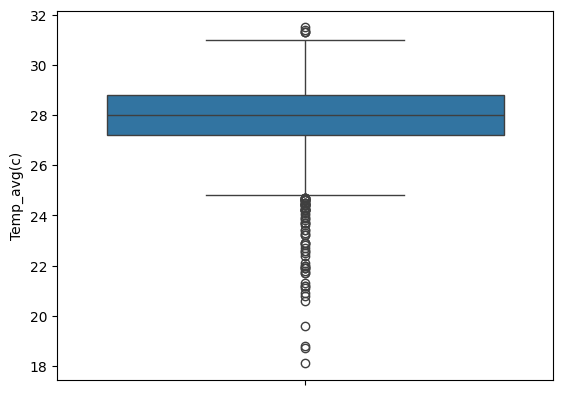

In [ ]:
sns.boxplot(weather_df['Temp_avg(c)'])

In [ ]:
plt.show()

In [ ]:
Q1 = weather_df['Temp_avg(c)'].quantile(0.25)
Q3 = weather_df['Temp_avg(c)'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and filter out the outliers
print("\nDisplay Outliers")
print (weather_df[((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

# Display data without outliers
weatherRemOut_df = weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))]
print("\nDisplay data without outliers")
print(weatherRemOut_df)

IQR: 1.60
Lower_Fence: 24.80
Upper_Fence: 31.20

Display Outliers
      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
10           31.1         24.2        -17.8        22.8        20.5   
13           32.2         21.2        -17.8        23.9        17.4   
36           32.2         22.6        -17.8        23.9        19.4   
62           35.0         23.3        -17.8        25.0        18.9   
600          32.8         23.9        -17.8        25.0        21.6   
...           ...          ...          ...         ...         ...   
7003         25.0         23.7         22.8        23.9        22.6   
7352         25.0         24.4         23.9        23.9        23.6   
7495         36.1         31.3         27.2        26.1        24.2   
7754         26.1         24.3         22.2        23.9        22.9   
7790         26.1         24.6         23.9        23.9        23.4   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
10        

In [ ]:
# Shuffle the data to avoid bias
df_shuffled = shuffle(weatherRemOut_df, random_state=42)

In [ ]:
# Initialize RobustScaler
scaler = RobustScaler()

In [ ]:
# Fit the scaler to data and transform
scaled_data = scaler.fit_transform(df_shuffled)


In [ ]:
# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_shuffled.columns)
print("\nScaled Data: \n", scaled_df)


Scaled Data: 
       Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0        0.000000      -0.3125          0.0         0.0    0.307692   
1       -0.352941      -0.7500         -1.0         0.0   -0.230769   
2        0.647059       0.3125          0.0         0.5    0.769231   
3       -0.352941      -0.4375          0.0        -0.5   -0.538462   
4       -1.000000      -0.3750          0.0         0.5    0.461538   
...           ...          ...          ...         ...         ...   
8164     0.647059       0.3125          1.0         0.5    0.153846   
8165     0.647059       0.6250          0.0        -0.5   -0.538462   
8166     1.294118       0.4375          0.0         0.0    0.000000   
8167    -1.000000      -1.3750         -1.0         0.5    0.230769   
8168    -1.000000      -0.8750         -1.0         0.0   -0.461538   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0      -1.000000         0.0    0.402439         0.7       2

In [ ]:
# Define the dependent variable
DV = 'Temp_avg(c)'
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
164/164 [==============================] - 1s 4ms/step - loss: 4.4260 - val_loss: 0.1477
Epoch 2/100
164/164 [==============================] - 0s 2ms/step - loss: 0.1161 - val_loss: 0.0868
Epoch 3/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0684 - val_loss: 0.0581
Epoch 4/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.1173
Epoch 5/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0331
Epoch 6/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.2770
Epoch 7/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0647 - val_loss: 0.0759
Epoch 8/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0761
Epoch 9/100
164/164 [==============================] - 0s 2ms/step - loss: 0.1870 - val_loss: 0.9302
Epoch 10/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0498 - val_lo

52/52 [==============================] - 0s 2ms/step


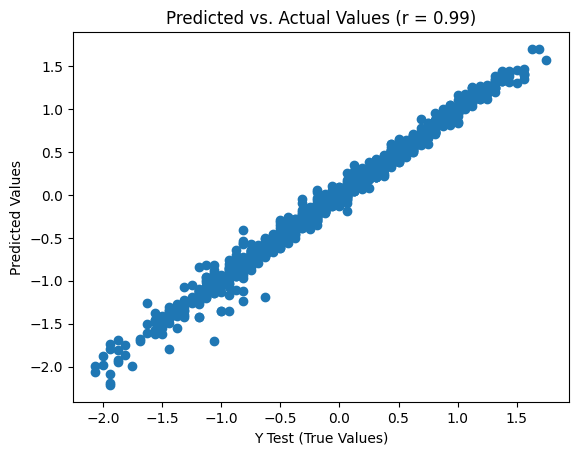

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions.flatten())[0]))
plt.show()



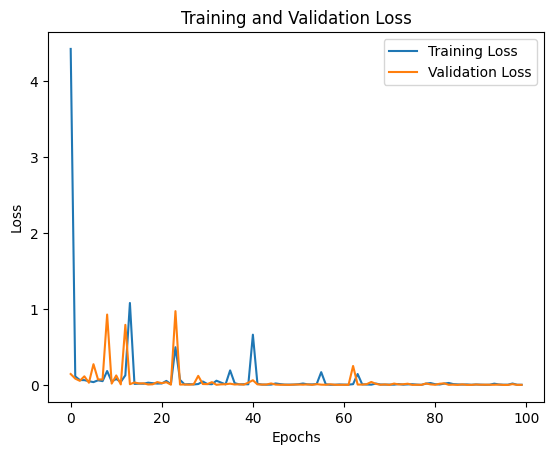

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

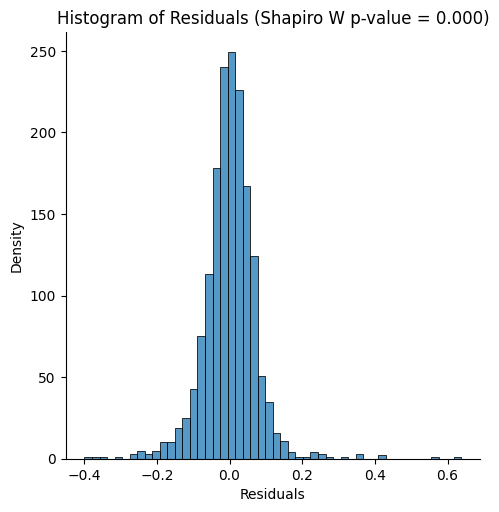

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.073
3  R-Squared  0.989


In [ ]:
# Plot the residuals
sns.displot((y_test - predictions.flatten()), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions.flatten())[1]))
plt.show()

# Print evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, predictions),
        metrics.mean_squared_error(y_test, predictions),
        np.sqrt(metrics.mean_squared_error(y_test, predictions)),
        metrics.explained_variance_score(y_test, predictions)
    ]
}).round(3)
print(metrics_df)


In [ ]:
# Flatten predictions for consistency in metrics calculations
predictions_flat = predictions.flatten()

# Compute the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, predictions_flat),
        metrics.mean_squared_error(y_test, predictions_flat),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_flat)),
        metrics.explained_variance_score(y_test, predictions_flat)
    ]
}).round(3)

# Print the metrics DataFrame
print(metrics_df)

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.073
3  R-Squared  0.989


# SVR Model

## **Split the Data**

Train : 70
Test  : 30

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#load data
data = pd.read_csv('scaled_data.csv')

#split data into train and test sets
train, test = train_test_split(data, test_size=0.3)

#save data
# train.to_csv('train_data.csv', index=False)
# test.to_csv('test_data.csv', index=False)


## **SVR MODEL**

In [ ]:
#fitting SVR into the dataset

from sklearn.svm import SVR

X_train = train.iloc[:,np.r_[0,2:15]]
y_train = train.iloc[:,1]
X_test = test.iloc[:,np.r_[0,2:15]]
y_test = test.iloc[:,1]

regressor = SVR(kernel = 'rbf')
# regressor = SVR (kernel = 'linear') #C:100.epsilon:0.1,gamma:scale
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 1],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }

# grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

In [ ]:
best_params

NameError: name 'best_params' is not defined

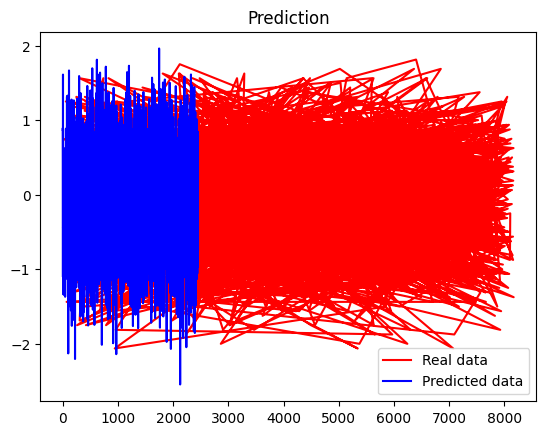

In [ ]:
#plot the graph
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


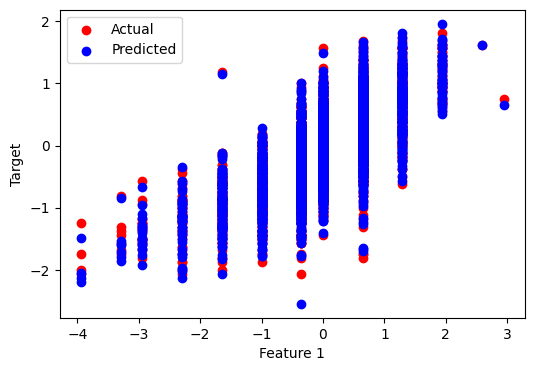

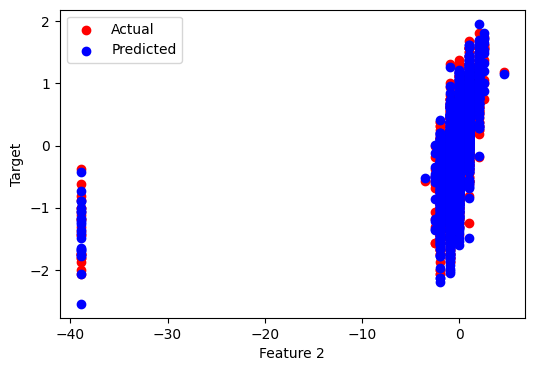

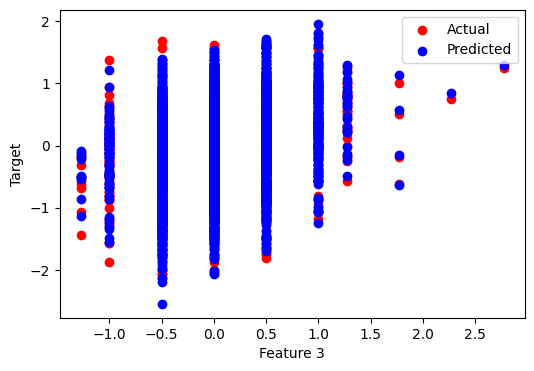

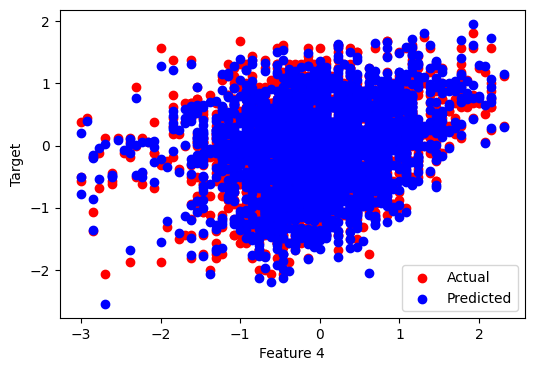

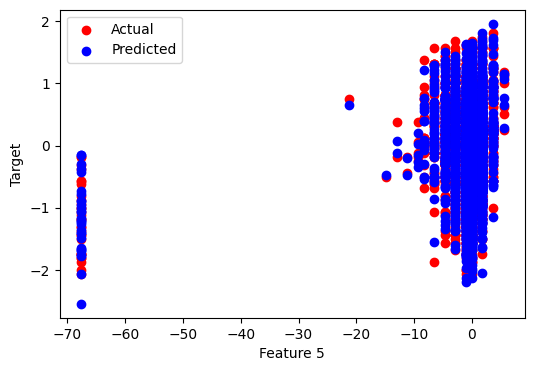

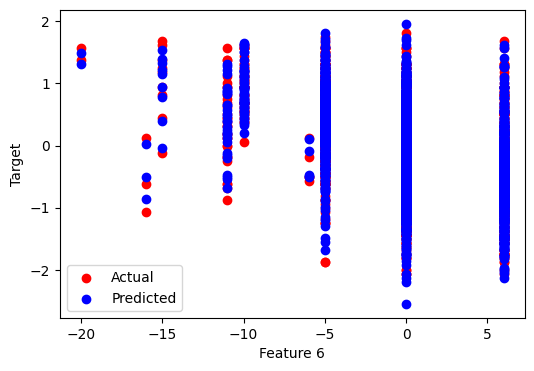

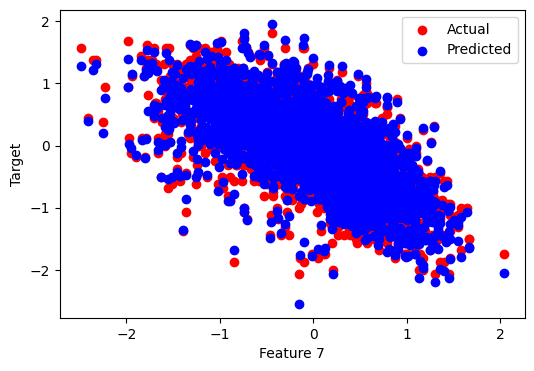

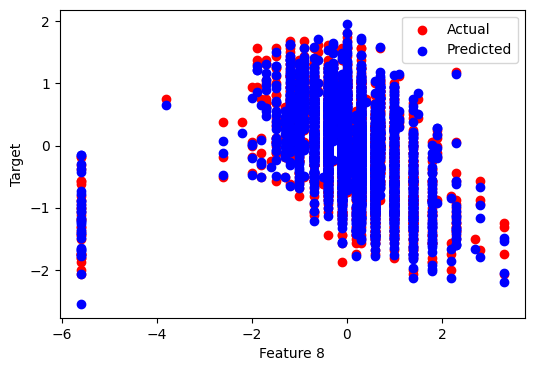

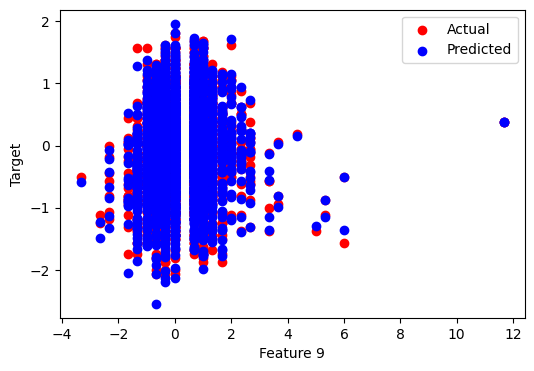

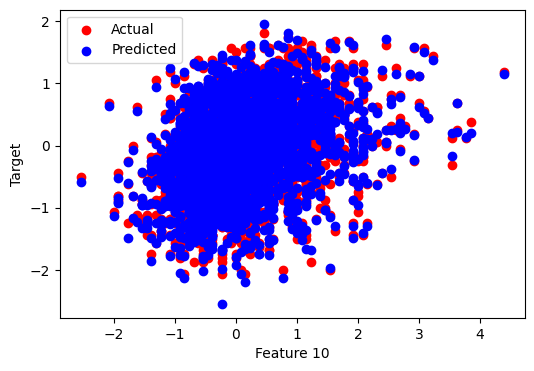

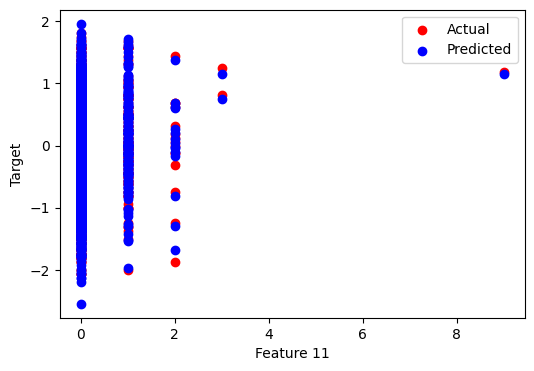

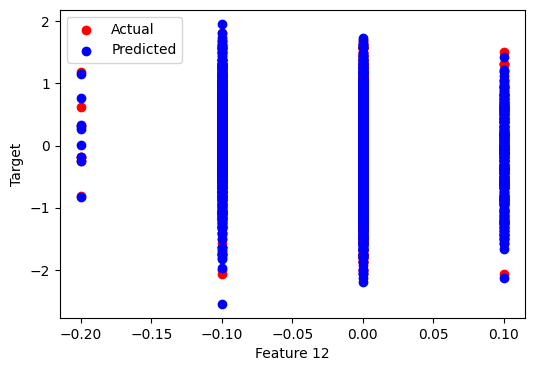

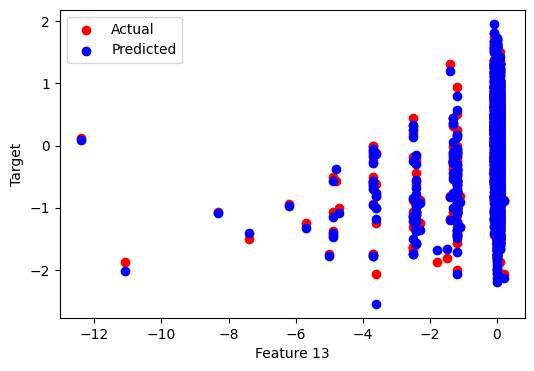

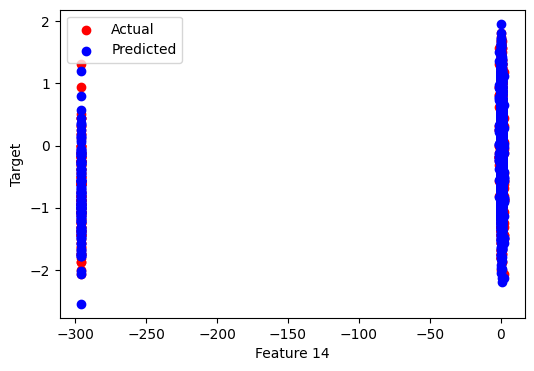

In [ ]:
for i in range(X_test.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test.iloc[:, i], y_test, color='red', label='Actual')
    plt.scatter(X_test.iloc[:, i], y_pred, color='blue', label='Predicted')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

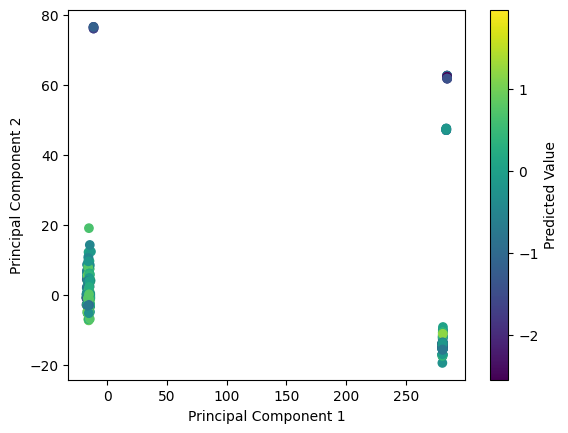

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of X_test to 2
pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

# Plot the reduced data
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Value')
plt.show()

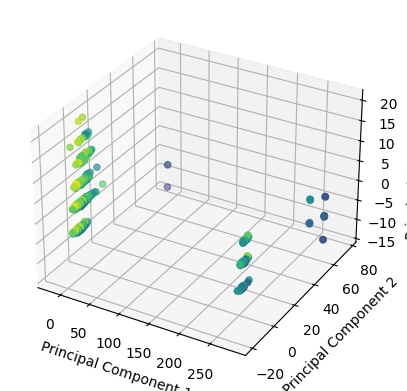

In [ ]:
# Reduce the dimensionality of X_test to 5
pca = PCA(n_components=5)
X_test_reduced = pca.fit_transform(X_test)

# Plot the reduced data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], c=y_pred)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## Evaluation

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_train, y_pred_train),
metrics.mean_squared_error (y_train, y_pred_train),
np.sqrt (metrics.mean_squared_error (y_train, y_pred_train)),
metrics.explained_variance_score (y_train, y_pred_train)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.051890
1        MSE  0.004741
2       RMSE  0.068852
3  R-Squared  0.990911


In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, y_pred),
metrics.mean_squared_error (y_test, y_pred),
np.sqrt (metrics.mean_squared_error (y_test, y_pred)),
metrics.explained_variance_score (y_test, y_pred)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.051074
1        MSE  0.004576
2       RMSE  0.067648
3  R-Squared  0.990706


to check if overfitting occur we try to pred using y_train data and check the perfomance

The result is the model is not overfitting since the MAE,MSE,RMSE and R-squared are different value but are close to each other

In [ ]:
from sklearn.model_selection import cross_val_score

# cross-validation
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())


scores = cross_val_score(regressor, X_test, y_test, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.99129398 0.99066826 0.99081885 0.9906012  0.99047873]
Average cross-validation score:  0.9907722041893134
Cross-validation scores:  [0.98950967 0.99020395 0.99157559 0.99209602 0.98968579]
Average cross-validation score:  0.9906142052628029


to check further , we check by using cross-validation : the result is good as both test and train data is accurate . The test data is less accurate because the test data is fewer than train

## When using different kernel

By using rbf , the data is accurate and not overfitting
By using linear , the data seem overfitting
By using poly and sigmoid, the data is not occurate at all

# Gradient Boosting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#load data
data = pd.read_csv('scaled_data.csv')

#split data into train and test sets
train, test = train_test_split(data, test_size=0.3)


X_train = train.iloc[:,np.r_[0,2:15]]
y_train = train.iloc[:,1]
X_test = test.iloc[:,np.r_[0,2:15]]
y_test = test.iloc[:,1]


## MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

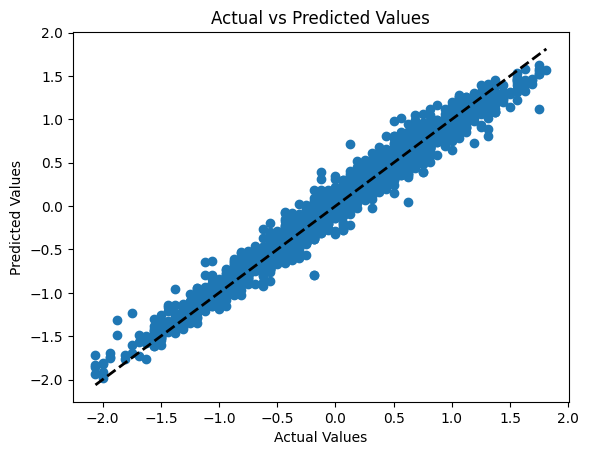

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line for perfect correlation. This serves as a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

## Evaluation

In [ ]:
# Performance Metrics
from sklearn import metrics

y_pred = model.predict(X_test)

metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, y_pred),
metrics.mean_squared_error (y_test, y_pred),
np.sqrt (metrics.mean_squared_error (y_test, y_pred)),
metrics.explained_variance_score (y_test, y_pred)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.092787
1        MSE  0.015040
2       RMSE  0.122637
3  R-Squared  0.970529


# Random Forest

### PIP INSTALLING STUFF

In [ ]:
%pip install beautifulsoup4
%pip install selenium
%pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## IMPORTING STUFF

In [ ]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException

## FUNCTION FOR RENDERING PAGE

* Render the page in the background

In [ ]:
def render_page(url):
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # Set up Chrome service
    service = Service(ChromeDriverManager().install())
    # Create new instance of Chrome in headless mode
    driver = webdriver.Chrome(service=service, options=chrome_options)
    # Set timeout to 10 seconds
    driver.set_page_load_timeout(360)
    # Navigate to the page
    driver.get(url)
    # Let the page load
    time.sleep(3)
    # Get page source
    r = driver.page_source
    # Close the browser
    driver.quit()

    return r

## FUNCTION FOR WEBSCRAPING WUNDERGROUND.COM

* Extract the historical data in wunderground.com
* handles error by storing the dates in error_dates
* continue to next date when encounter errors

In [ ]:
error_dates = []  # Array to store dates that caused errors

def scraper(page, dates):
    output = pd.DataFrame()
    dfs = []
    

    for d in dates:
        
        try:

            url = str(str(page) + str(d))
            r = render_page(url)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            else:
                print('Data not in normal length')
        
        except Exception as e:
            print(f"An error occurred for date: {d}. Error: {str(e)}")
            error_dates.append(d) 
            continue 

        df_final = pd.concat([Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation], axis=1)
        df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

        dfs.append(df_final)

        output = pd.concat(dfs, ignore_index=True)
        

    print('Scraper done!')
    print(f"Errors occurred on the following dates: {error_dates}")

    output = output[['Date','Temp_max','Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                        'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                        'Pres_avg', 'Pres_min', 'Precipitation']]

    return output

## FINISHING AND ORGANISE THE DATA

* Clean the data and organise it into a usable format
* display the data

In [ ]:
def finish_and_organise(df_output):

    df_output_1 = df_output.copy()

    # Set the maximum number of rows displayed to None, which means all rows will be displayed
    pd.set_option('display.max_rows', None)
    # Remove duplicate rows
    df_output_1 = df_output_1.drop_duplicates()
    # Remove rows where date is NaN
    df_output_1 = df_output_1.dropna(subset=['Date'])
    # Convert 'Date' to datetime
    df_output_1['Date'] = pd.to_datetime(df_output_1['Date']).dt.date
    # Extract year and month to a new column 'YearMonth'
    df_output_1['YearMonth'] = df_output_1['Date'].apply(lambda x: x.strftime('%Y-%m'))

    # Convert all columns except 'Date' into numeric
    for col in df_output_1.columns:
        if col != 'Date':
            df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')

    # Convert Temp and Dew data from Fahrenheit to Celsius
    for col in ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']:
        # Convert the column to numeric type, coercing non-numeric values to NaN
        df_output_1[col] = pd.to_numeric(df_output_1[col], errors='coerce')
        # Perform the conversion
        df_output_1[col] = ((df_output_1[col] - 32) * 5/9).round(1) 

    print("Final data length: ", len(df_output_1))
    # Create a list to hold the DataFrames
    dfs = []

    # For each unique 'YearMonth'
    for year_month in df_output_1['YearMonth'].unique():
        # Get the rows of the current 'YearMonth'
        rows = df_output_1[df_output_1['YearMonth'] == year_month]
        # Append the rows to the list
        dfs.append(rows)


    # Concatenate all DataFrames in the list
    weather_data = pd.concat(dfs).reset_index(drop=True)
    # Remove the 'YearMonth' column
    weather_data = weather_data.drop(columns=['YearMonth'])
    # Display the data
    print(weather_data)
    # Print the data type of each column
    print(weather_data.dtypes)

    return weather_data

## Convert to CSV file

* Convert 'Date' to datetime if it's not already
* Convert 'Date' to string in the format 'DD/MM/YYYY'
* Export the DataFrame to a CSV file

In [ ]:
def csv_conv(weather_data):
    # Convert 'Date' to datetime if it's not already
    if weather_data['Date'].dtype != 'datetime64[ns]':
        weather_data['Date'] = pd.to_datetime(weather_data['Date'])

    # Convert 'Date' to string in the format 'DD/MM/YYYY'
    weather_data['Date'] = weather_data['Date'].dt.strftime('%d/%m/%Y')
    # Export the DataFrame to a CSV file
    weather_data.to_csv('weather_datatest.csv', index=False)

## Display The Datasets

* Show the first and last row of each months in a readable format

In [ ]:
def show_datasets(df_output):
    # Create a list to hold the DataFrames
    dfs = []
    # Create a 'YearMonth' column from 'Date'
    df_output['YearMonth'] = pd.to_datetime(df_output['Date']).dt.to_period('M')

    # For each unique 'YearMonth'
    for year_month in df_output['YearMonth'].unique():
        # Get the first and last 3 rows of the current 'YearMonth'
        first_rows = df_output[df_output['YearMonth'] == year_month].head(1)
        last_rows = df_output[df_output['YearMonth'] == year_month].tail(1)
        # Concatenate the first and last rows
        result = pd.concat([first_rows, last_rows])
        # Append the result to the list
        dfs.append(result)
        # Create a separator DataFrame and append it to the list
        separator = pd.DataFrame({col: '-----' for col in df_output.columns}, index=[0])
        dfs.append(separator)

    # Concatenate all DataFrames in the list
    result = pd.concat(dfs).reset_index(drop=True)
    # Display the result
    display(result)

## RUN WEB SCRAPER

* Genrate dates from x year to y year

In [ ]:
def generate_dates(start_year, end_year):
    dates = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            if year == 2024 and month > 5:
                break
            dates.append(f'{year}-{month}')
        if year == 2024 and month > 5:
            break
    return dates

* Run the Web Scrapper
* Please Input the range of the year 

In [ ]:
# Enter the base page url to be scrape
# example:-
# page = 'https://www.wunderground.com/history/monthly/pt/lisbon/LPPT/date/'
page = 'https://www.wunderground.com/history/monthly/my/subang-jaya/WMSA/date/'

# Use the function to generate dates for a range of years
# dates = ['2024-3']
dates = generate_dates(2024, 2024)

# Run the scraper
df_output = scraper(page,dates)


2024-1 finished!
31
2024-2 finished!
29
2024-3 finished!
31
2024-4 finished!
30
Data not in normal length
Scraper done!
Errors occurred on the following dates: ['2012-7', '2016-6', '2024-3', '2002-10', '2003-5', '2003-10', '2004-4', '2004-12', '2010-9', '2011-5', '2013-6', '2017-2', '2019-11']


In [ ]:
#2006-7
weather_data = finish_and_organise(df_output)
csv_conv(weather_data)

# Run the scraper again with only the error dates
df_error_output = scraper(page, error_dates)
error_dates = []

# Concatenate the completed dataset and the error dataset
df_combined = pd.concat([df_output, df_error_output])

# Convert the 'Date' column to datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Sort the combined dataset by date
df_combined = df_combined.sort_values(by='Date')

# Reset the index of the combined dataset
df_combined.reset_index(drop=True, inplace=True)

show_datasets(df_combined)

C:\Users\Ahmad Taufiq\AppData\Local\Temp\ipykernel_12904\393973316.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')


Final data length:  151
           Date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0    2024-01-01      32.8      28.4      25.0     26.1     25.1     22.8   
1    2024-01-02      32.2      27.8      25.0     26.1     25.1     23.9   
2    2024-01-03      32.2      27.6      26.1     26.1     24.9     23.9   
3    2024-01-04      32.8      27.7      26.1     25.0     24.9     23.9   
4    2024-01-05      32.8      28.4      25.0     25.0     23.8     22.2   
5    2024-01-06      31.1      27.5      25.0     25.0     24.4     22.8   
6    2024-01-07      27.2      26.2      25.0     25.0     24.4     23.9   
7    2024-01-08      31.1      27.3      25.0     25.0     24.2     23.9   
8    2024-01-09      31.1      26.8      25.0     26.1     24.7     23.9   
9    2024-01-10      32.8      27.8      23.9     26.1     24.2     22.8   
10   2024-01-11      32.8      28.3      26.1     26.1     24.9     23.9   
11   2024-01-12      32.8      28.3      25.0     25.0     23.8 

Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2024-3 finished!
31


Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2002-10 finished!
31
2003-5 finished!
31
2003-10 finished!
31


KeyboardInterrupt: 

In [ ]:


import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn



In [ ]:
data_dir_1 = "/2001-2024.csv"
weather = pd.read_csv(data_dir_1)

FileNotFoundError: [Errno 2] No such file or directory: '/2001-2024.csv'

In [ ]:
print(weather)


            Date  Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  \
0      1/01/2001         32.8         28.7         25.0        23.9   
1      2/01/2001         31.1         24.8        -17.8        25.0   
2      3/01/2001         30.0         26.8         25.0        25.0   
3      4/01/2001         28.9         26.0         22.8        23.9   
4      5/01/2001         32.2         27.3         23.9        23.9   
...          ...          ...          ...          ...         ...   
8242  26/05/2024         35.0         28.7         26.1        26.1   
8243  27/05/2024         33.9         28.5         26.1        27.2   
8244  28/05/2024         33.9         29.7         26.1        27.2   
8245  29/05/2024         36.1         30.0         27.2        26.1   
8246  30/05/2024         33.9         28.5         26.1        27.2   

      Dew_avg(c)  Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  \
0           23.4        22.8          94        74.5          55   
1          

In [ ]:
print(weather.isna().sum())


Date             0
Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


In [ ]:
weather.shape

(8247, 17)

In [ ]:
weather_df = weather.drop('Date', axis=1)

In [ ]:
print(weather_df.isna().sum())

Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


<Axes: ylabel='Temp_avg(c)'>

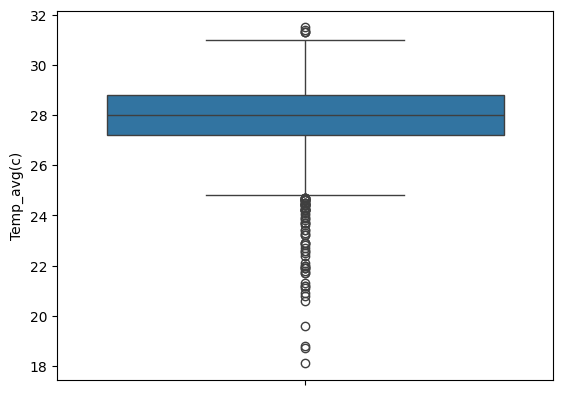

In [ ]:
sbn.boxplot(weather_df['Temp_avg(c)'])

IQR: 1.60
Lower_Fence: 24.80
Upper_Fence: 31.20

Display Outliers
      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
10           31.1         24.2        -17.8        22.8        20.5   
13           32.2         21.2        -17.8        23.9        17.4   
36           32.2         22.6        -17.8        23.9        19.4   
62           35.0         23.3        -17.8        25.0        18.9   
600          32.8         23.9        -17.8        25.0        21.6   
...           ...          ...          ...         ...         ...   
7003         25.0         23.7         22.8        23.9        22.6   
7352         25.0         24.4         23.9        23.9        23.6   
7495         36.1         31.3         27.2        26.1        24.2   
7754         26.1         24.3         22.2        23.9        22.9   
7790         26.1         24.6         23.9        23.9        23.4   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
10        

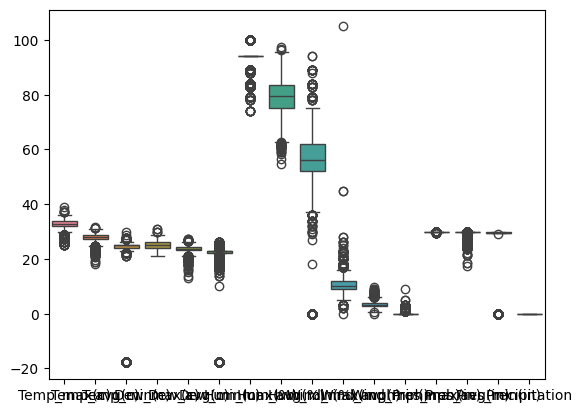

In [ ]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn
sbn.boxplot(weather_df)

# Compute the Interquartile Range (IQR)
Q1 = weather_df['Temp_avg(c)'].quantile(0.25)
Q3 = weather_df['Temp_avg(c)'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (weather_df[((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

In [ ]:
weatherRemOut_df = weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))]
print(weatherRemOut_df)

      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0            32.8         28.7         25.0        23.9        23.4   
1            31.1         24.8        -17.8        25.0        21.4   
2            30.0         26.8         25.0        25.0        23.9   
3            28.9         26.0         22.8        23.9        23.2   
4            32.2         27.3         23.9        23.9        21.8   
...           ...          ...          ...         ...         ...   
8242         35.0         28.7         26.1        26.1        25.3   
8243         33.9         28.5         26.1        27.2        25.7   
8244         33.9         29.7         26.1        27.2        26.0   
8245         36.1         30.0         27.2        26.1        25.5   
8246         33.9         28.5         26.1        27.2        25.9   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0           22.8          94        74.5          55              8   
1    

In [ ]:
from sklearn.utils import shuffle

# Shuffle the data to avoid biasness

df_shuffled = shuffle(weatherRemOut_df, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize StandardScaler
scaler = RobustScaler()

# Fit the scaler to data and transform
scaled_data = scaler.fit_transform(df_shuffled)

# Covert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = df_shuffled.columns)
print("\nScaled Data: \n", scaled_df)


Scaled Data: 
       Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0        0.000000      -0.3125          0.0         0.0    0.307692   
1       -0.352941      -0.7500         -1.0         0.0   -0.230769   
2        0.647059       0.3125          0.0         0.5    0.769231   
3       -0.352941      -0.4375          0.0        -0.5   -0.538462   
4       -1.000000      -0.3750          0.0         0.5    0.461538   
...           ...          ...          ...         ...         ...   
8164     0.647059       0.3125          1.0         0.5    0.153846   
8165     0.647059       0.6250          0.0        -0.5   -0.538462   
8166     1.294118       0.4375          0.0         0.0    0.000000   
8167    -1.000000      -1.3750         -1.0         0.5    0.230769   
8168    -1.000000      -0.8750         -1.0         0.0   -0.461538   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0      -1.000000         0.0    0.402439         0.7       2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, shapiro
import pandas as pd


In [ ]:
# Assuming scaled_df is already prepared and scaled as per your preprocessing steps
DV = 'Temp_avg(c)'
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(x_test)


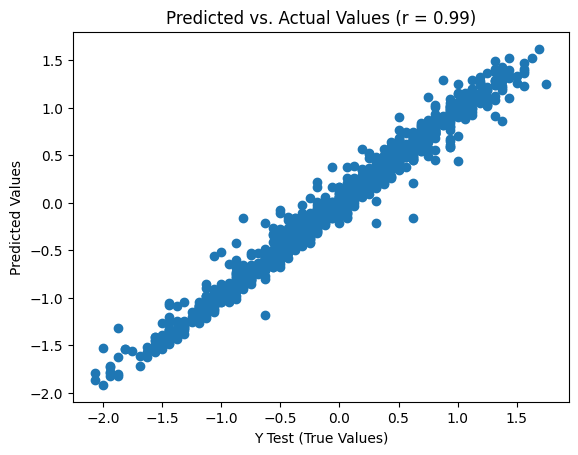

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()


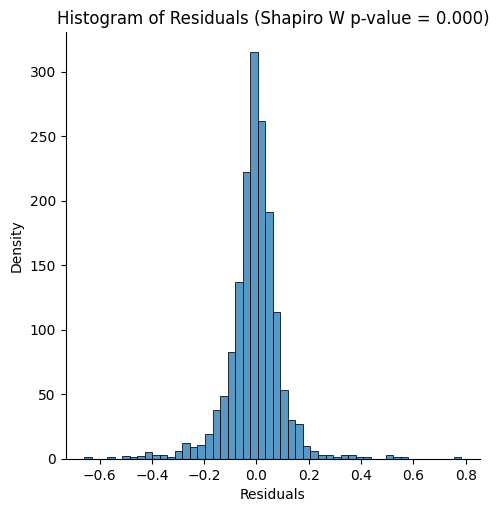

In [ ]:
sns.displot((y_test - predictions), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()


In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, predictions),
        metrics.mean_squared_error(y_test, predictions),
        np.sqrt(metrics.mean_squared_error(y_test, predictions)),
        metrics.explained_variance_score(y_test, predictions)
    ]
}).round(3)
print(metrics_df)


      Metric  Value
0        MAE  0.067
1        MSE  0.011
2       RMSE  0.103
3  R-Squared  0.979


### PIP INSTALLING STUFF

In [ ]:
%pip install beautifulsoup4
%pip install selenium
%pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## IMPORTING STUFF

In [ ]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException

## FUNCTION FOR RENDERING PAGE

* Render the page in the background

In [ ]:
def render_page(url):
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # Set up Chrome service
    service = Service(ChromeDriverManager().install())
    # Create new instance of Chrome in headless mode
    driver = webdriver.Chrome(service=service, options=chrome_options)
    # Set timeout to 10 seconds
    driver.set_page_load_timeout(360)
    # Navigate to the page
    driver.get(url)
    # Let the page load
    time.sleep(3)
    # Get page source
    r = driver.page_source
    # Close the browser
    driver.quit()

    return r

## FUNCTION FOR WEBSCRAPING WUNDERGROUND.COM

* Extract the historical data in wunderground.com
* handles error by storing the dates in error_dates
* continue to next date when encounter errors

In [ ]:
error_dates = []  # Array to store dates that caused errors

def scraper(page, dates):
    output = pd.DataFrame()
    dfs = []
    

    for d in dates:
        
        try:

            url = str(str(page) + str(d))
            r = render_page(url)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                            columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                            columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
                print(str(round(len(data) / 17 - 1)))
            else:
                print('Data not in normal length')
        
        except Exception as e:
            print(f"An error occurred for date: {d}. Error: {str(e)}")
            error_dates.append(d) 
            continue 

        df_final = pd.concat([Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation], axis=1)
        df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

        dfs.append(df_final)

        output = pd.concat(dfs, ignore_index=True)
        

    print('Scraper done!')
    print(f"Errors occurred on the following dates: {error_dates}")

    output = output[['Date','Temp_max','Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                        'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                        'Pres_avg', 'Pres_min', 'Precipitation']]

    return output

## FINISHING AND ORGANISE THE DATA

* Clean the data and organise it into a usable format
* display the data

In [ ]:
def finish_and_organise(df_output):

    df_output_1 = df_output.copy()

    # Set the maximum number of rows displayed to None, which means all rows will be displayed
    pd.set_option('display.max_rows', None)
    # Remove duplicate rows
    df_output_1 = df_output_1.drop_duplicates()
    # Remove rows where date is NaN
    df_output_1 = df_output_1.dropna(subset=['Date'])
    # Convert 'Date' to datetime
    df_output_1['Date'] = pd.to_datetime(df_output_1['Date']).dt.date
    # Extract year and month to a new column 'YearMonth'
    df_output_1['YearMonth'] = df_output_1['Date'].apply(lambda x: x.strftime('%Y-%m'))

    # Convert all columns except 'Date' into numeric
    for col in df_output_1.columns:
        if col != 'Date':
            df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')

    # Convert Temp and Dew data from Fahrenheit to Celsius
    for col in ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']:
        # Convert the column to numeric type, coercing non-numeric values to NaN
        df_output_1[col] = pd.to_numeric(df_output_1[col], errors='coerce')
        # Perform the conversion
        df_output_1[col] = ((df_output_1[col] - 32) * 5/9).round(1) 

    print("Final data length: ", len(df_output_1))
    # Create a list to hold the DataFrames
    dfs = []

    # For each unique 'YearMonth'
    for year_month in df_output_1['YearMonth'].unique():
        # Get the rows of the current 'YearMonth'
        rows = df_output_1[df_output_1['YearMonth'] == year_month]
        # Append the rows to the list
        dfs.append(rows)


    # Concatenate all DataFrames in the list
    weather_data = pd.concat(dfs).reset_index(drop=True)
    # Remove the 'YearMonth' column
    weather_data = weather_data.drop(columns=['YearMonth'])
    # Display the data
    print(weather_data)
    # Print the data type of each column
    print(weather_data.dtypes)

    return weather_data

## Convert to CSV file

* Convert 'Date' to datetime if it's not already
* Convert 'Date' to string in the format 'DD/MM/YYYY'
* Export the DataFrame to a CSV file

In [ ]:
def csv_conv(weather_data):
    # Convert 'Date' to datetime if it's not already
    if weather_data['Date'].dtype != 'datetime64[ns]':
        weather_data['Date'] = pd.to_datetime(weather_data['Date'])

    # Convert 'Date' to string in the format 'DD/MM/YYYY'
    weather_data['Date'] = weather_data['Date'].dt.strftime('%d/%m/%Y')
    # Export the DataFrame to a CSV file
    weather_data.to_csv('weather_datatest.csv', index=False)

## Display The Datasets

* Show the first and last row of each months in a readable format

In [ ]:
def show_datasets(df_output):
    # Create a list to hold the DataFrames
    dfs = []
    # Create a 'YearMonth' column from 'Date'
    df_output['YearMonth'] = pd.to_datetime(df_output['Date']).dt.to_period('M')

    # For each unique 'YearMonth'
    for year_month in df_output['YearMonth'].unique():
        # Get the first and last 3 rows of the current 'YearMonth'
        first_rows = df_output[df_output['YearMonth'] == year_month].head(1)
        last_rows = df_output[df_output['YearMonth'] == year_month].tail(1)
        # Concatenate the first and last rows
        result = pd.concat([first_rows, last_rows])
        # Append the result to the list
        dfs.append(result)
        # Create a separator DataFrame and append it to the list
        separator = pd.DataFrame({col: '-----' for col in df_output.columns}, index=[0])
        dfs.append(separator)

    # Concatenate all DataFrames in the list
    result = pd.concat(dfs).reset_index(drop=True)
    # Display the result
    display(result)

## RUN WEB SCRAPER

* Genrate dates from x year to y year

In [ ]:
def generate_dates(start_year, end_year):
    dates = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            if year == 2024 and month > 5:
                break
            dates.append(f'{year}-{month}')
        if year == 2024 and month > 5:
            break
    return dates

* Run the Web Scrapper
* Please Input the range of the year 

In [ ]:
# Enter the base page url to be scrape
# example:-
# page = 'https://www.wunderground.com/history/monthly/pt/lisbon/LPPT/date/'
page = 'https://www.wunderground.com/history/monthly/my/subang-jaya/WMSA/date/'

# Use the function to generate dates for a range of years
# dates = ['2024-3']
dates = generate_dates(2024, 2024)

# Run the scraper
df_output = scraper(page,dates)


2024-1 finished!
31
2024-2 finished!
29
2024-3 finished!
31
2024-4 finished!
30
Data not in normal length
Scraper done!
Errors occurred on the following dates: ['2012-7', '2016-6', '2024-3', '2002-10', '2003-5', '2003-10', '2004-4', '2004-12', '2010-9', '2011-5', '2013-6', '2017-2', '2019-11']


In [ ]:
#2006-7
weather_data = finish_and_organise(df_output)
csv_conv(weather_data)

# Run the scraper again with only the error dates
df_error_output = scraper(page, error_dates)
error_dates = []

# Concatenate the completed dataset and the error dataset
df_combined = pd.concat([df_output, df_error_output])

# Convert the 'Date' column to datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Sort the combined dataset by date
df_combined = df_combined.sort_values(by='Date')

# Reset the index of the combined dataset
df_combined.reset_index(drop=True, inplace=True)

show_datasets(df_combined)

C:\Users\Ahmad Taufiq\AppData\Local\Temp\ipykernel_12904\393973316.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_output_1[col] = pd.to_numeric(df_output_1[col], errors='ignore')


Final data length:  151
           Date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0    2024-01-01      32.8      28.4      25.0     26.1     25.1     22.8   
1    2024-01-02      32.2      27.8      25.0     26.1     25.1     23.9   
2    2024-01-03      32.2      27.6      26.1     26.1     24.9     23.9   
3    2024-01-04      32.8      27.7      26.1     25.0     24.9     23.9   
4    2024-01-05      32.8      28.4      25.0     25.0     23.8     22.2   
5    2024-01-06      31.1      27.5      25.0     25.0     24.4     22.8   
6    2024-01-07      27.2      26.2      25.0     25.0     24.4     23.9   
7    2024-01-08      31.1      27.3      25.0     25.0     24.2     23.9   
8    2024-01-09      31.1      26.8      25.0     26.1     24.7     23.9   
9    2024-01-10      32.8      27.8      23.9     26.1     24.2     22.8   
10   2024-01-11      32.8      28.3      26.1     26.1     24.9     23.9   
11   2024-01-12      32.8      28.3      25.0     25.0     23.8 

Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2024-3 finished!
31


Exception ignored in: <function Service.__del__ at 0x000001A2F4E10F40>
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 189, in __del__
    self.stop()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 146, in stop
    self.send_remote_shutdown_command()
  File "c:\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 126, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "c:\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\urllib\request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2002-10 finished!
31
2003-5 finished!
31
2003-10 finished!
31


KeyboardInterrupt: 